In [1]:
import torch
from sd_pipeline import StableDiffusion3Pipeline
from sd_processor import JointAttnProcessor2_0
pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium", torch_dtype=torch.bfloat16)
pipe = pipe.to("cuda")

/home/wg25r/miniconda/envs/mochi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]


In [2]:
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = JointAttnProcessor2_0()

100%|██████████| 28/28 [00:09<00:00,  3.08it/s]


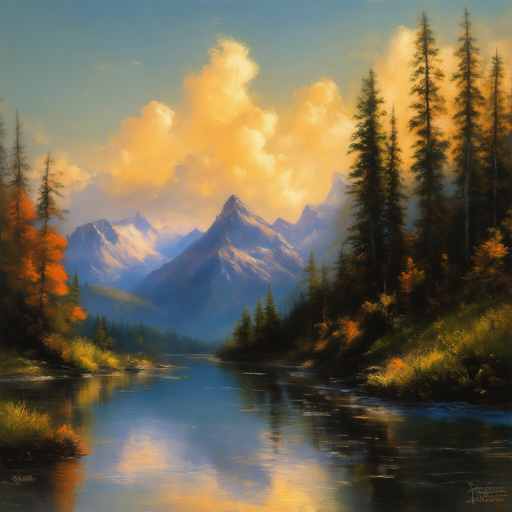

In [3]:
image = pipe(
    "a beautiful landscape, in the style of Bob Ross",
    negative_prompt="trees",
    num_inference_steps=28,
    guidance_scale=5,
    generator=torch.manual_seed(42),
).images[0]
image.resize((512, 512))

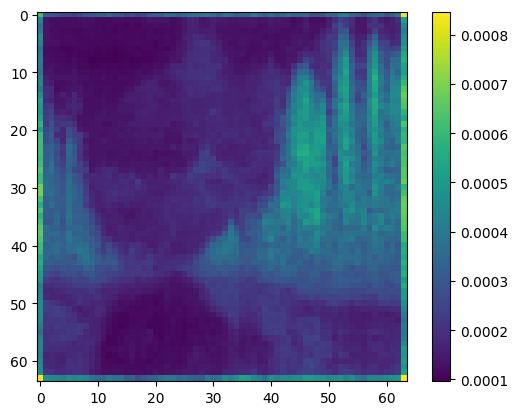

In [5]:
import pylab
map = torch.stack(pipe.neg_maps)[10].mean((0,1,2,3)).reshape(64, 64).cpu().float().numpy()
pylab.imshow(map) 
pylab.colorbar() 